<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0116_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] 실전! 데이터 실습 (8)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [8]:
# 기본 세팅
df = sns.load_dataset('taxis')

df['pickup'] = df['pickup'].astype(str)
df['dropoff'] = df['dropoff'].astype(str)

df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## (1) pickup 컬럼을 datetime 자료형으로 바꾸고, weekday를 추출하여 weekday 컬럼을 만드세요.

In [10]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])

In [12]:
df.dtypes

,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


In [14]:
df['weekday'] = df['pickup'].dt.weekday

In [15]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5


## (2) pickup과 dropoff의 시간차를 확인하여, 소요 시간의 컬럼을 만드세요.

In [17]:
# 시간 사이 연산
# 소요 시간 = 하차 시간 - 승차 시간
df['duration'] = df['dropoff'] - df['pickup']
df['duration'].head()

,duration
0,0 days 00:06:15
1,0 days 00:07:05
2,0 days 00:07:24
3,0 days 00:25:52
4,0 days 00:09:32


## (3) 주말 여부인 경우만 필터링하여, weekend_df를 만드세요.

In [18]:
df['weekday'].value_counts()

,count
weekday,
4,1115
5,1046
2,966
3,905
6,868
1,825
0,708


In [19]:
# 주말(5,6)인 경우만 필터링 조건 생성
df['weekday'].isin([5,6])

,weekday
0,True
1,False
2,False
3,True
4,True
...,...
6428,True
6429,True
6430,True
6431,False


In [21]:
weekend_df = df[df['weekday'].isin([5,6])].copy()

In [22]:
weekend_df['weekday'].value_counts()

,count
weekday,
5,1046
6,868


## (4) 주말 운행 건수와 주말 요금의 평균을 확인하세요.

In [23]:
weekend_df.shape

(1914, 16)

In [24]:
weekend_df['fare'].mean()

np.float64(12.531776384535005)

## (5) 요일별 운행 건수 및 평균 요금을 확인하세요.

In [34]:
weekly_df = df.groupby('weekday')['fare'].agg(['size','mean'])

In [35]:
weekly_df

,size,mean
weekday,,
0,708,13.378644
1,825,13.328291
2,966,13.552122
3,905,13.300420
4,1115,13.123677
5,1046,12.486960
6,868,12.585783


In [36]:
weekly_df.index = ['월','화','수','목','금','토','일']

In [37]:
weekly_df

,size,mean
월,708,13.378644
화,825,13.328291
수,966,13.552122
목,905,13.300420
금,1115,13.123677
토,1046,12.486960
일,868,12.585783


Text(0.5, 1.0, '요일별 평균 요금')

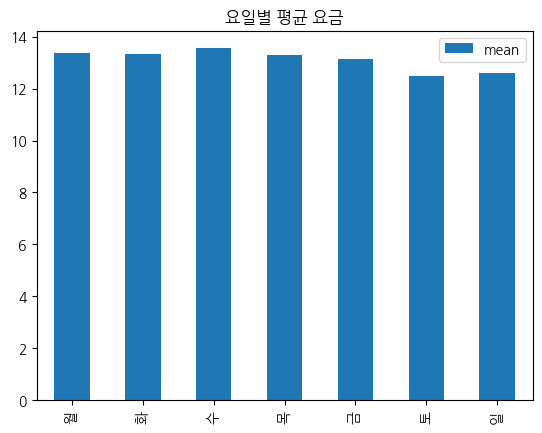

In [43]:
weekly_df.plot.bar(y='mean')
plt.title('요일별 평균 요금')

# 실전! 데이터 실습 (9)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [3]:
import os
os.chdir('/content/drive/MyDrive/새싹2기/데이터분석/data')

In [4]:
os.getcwd()

'/content/drive/MyDrive/새싹2기/데이터분석/data'

In [5]:
dow = pd.read_csv('dowjones.csv')

### (1) 데이터의 정보를 확인하고, 결측치 여부를 확인하세요.

In [6]:
dow.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


In [8]:
dow.dtypes

,0
Date,object
Price,float64


In [7]:
dow.shape

(649, 2)

In [9]:
dow.isnull().sum() # 10% 정도의 결측

,0
Date,0
Price,64


### (2) 결측치가 있는 행을 삭제해 보세요.

In [10]:
dow_na_del = dow.dropna()
dow_na_del.shape

(585, 2)

### (3) 결측치가 있는 행을 평균값으로 대체해 보세요.

In [13]:
dow_na_avg = dow.fillna({'Price':dow['Price'].mean()})
dow_na_avg.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


-> 두 케이스 모두 시간에 대한 고려가 되어 있지 않음

<Axes: xlabel='Date', ylabel='Price'>

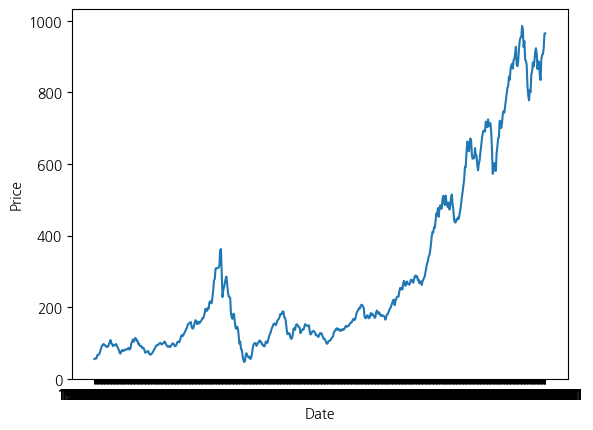

In [14]:
sns.lineplot(data=dow_na_del, x='Date', y='Price')
# 그래프 상에서는 티나지는 않음 -> 그러나 정보 누락

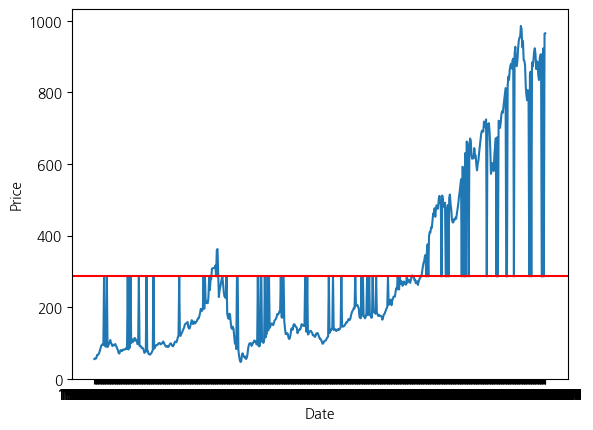

In [19]:
# 시간특성을 고려하지 않아서, 결측처리의 결과가 좋지 못함
sns.lineplot(data=dow_na_avg, x='Date', y='Price')

plt.axhline(y=dow['Price'].mean(),color='red')

### (3) Date를 시계열 인덱스로 바꾸고, 선형 보간을 해 보세요.

In [20]:
dow['Date'] = pd.to_datetime(dow['Date'])

In [22]:
dow = dow.set_index('Date')

In [23]:
dow.sort_index(inplace=True)

In [26]:
dow.index

DatetimeIndex(['1914-12-01', '1915-01-01', '1915-02-01', '1915-03-01',
               '1915-04-01', '1915-05-01', '1915-06-01', '1915-07-01',
               '1915-08-01', '1915-09-01',
               ...
               '1968-03-01', '1968-04-01', '1968-05-01', '1968-06-01',
               '1968-07-01', '1968-08-01', '1968-09-01', '1968-10-01',
               '1968-11-01', '1968-12-01'],
              dtype='datetime64[ns]', name='Date', length=649, freq=None)

In [28]:
# 동일 간격(월), 동일 시점(1일)
dow_na_linear = dow['Price'].interpolate(method='linear')
dow_na_linear.head()

,Price
Date,
1914-12-01,55.00
1915-01-01,56.55
1915-02-01,56.00
1915-03-01,58.30
1915-04-01,66.45


In [29]:
dow_na_linear.isnull().sum()

np.int64(0)

In [31]:
type(dow_na_linear)

pandas.core.series.Series

In [32]:
dow_na_linear = dow_na_linear.reset_index()
dow_na_linear

,Date,Price
0,1914-12-01,55.000000
1,1915-01-01,56.550000
2,1915-02-01,56.000000
3,1915-03-01,58.300000
4,1915-04-01,66.450000
...,...,...
644,1968-08-01,917.473333
645,1968-09-01,922.800000
646,1968-10-01,943.460000
647,1968-11-01,964.120000


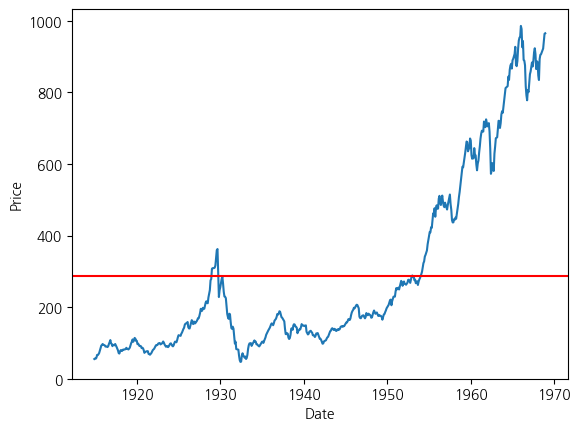

In [33]:
# 시간특성을 고려하지 않아서, 결측처리의 결과가 좋지 못함
sns.lineplot(data=dow_na_linear, x='Date', y='Price')

plt.axhline(y=dow['Price'].mean(),color='red')

In [34]:
dow_na_linear.shape

(649, 2)

In [35]:
dow_na_del.shape

(585, 2)